In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv('Churn_modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
len(data)
data.shape

(10000, 14)

In [4]:
data.isnull().values.any()

False

In [5]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Renaming the Column
data=data.rename(columns={'CredRate':'CreditScore',\
                          'ActMem':'IsActiveMember',\
                          'ProdNumber':'Num of products',\
                          'Exited':'Churn'})

In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn'],
      dtype='object')

In [11]:
data.drop(labels=['CustomerId'],axis=1,inplace = True)
data.drop(labels=['Surname'], axis=1,inplace = True)
column_churn=data['Churn']
data.drop(labels=['Churn'], axis=1,inplace = True)
data.insert(len(data.columns),'Churn',column_churn.values)

In [12]:
data.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [13]:
data["Geography"] = data["Geography"].astype('category') 
data["Gender"] = data["Gender"].astype('category') 
data["HasCrCard"] = data["HasCrCard"].astype('category') 
data["Churn"] = data["Churn"].astype('category') 
data["IsActiveMember"] = data["IsActiveMember"].astype('category')

In [14]:
data.dtypes

RowNumber             int64
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

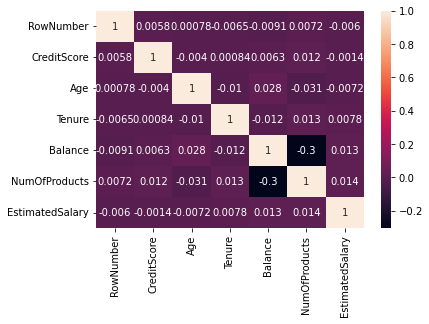

In [16]:
#correlation
corr=data.corr()
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values,annot=True)

In [17]:
data['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [18]:
data['Churn'].value_counts(1)*100

0    79.63
1    20.37
Name: Churn, dtype: float64

In [19]:
data['HasCrCard'].value_counts(1)*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [20]:
data.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [21]:
#mean attributes
summary_churn=data.groupby('Churn')
summary_churn.mean()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,5024.694964,651.853196,37.408389,5.033279,72745.296779,1.544267,99738.391772
1,4905.917526,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [22]:
#median attributes
summary_churn.median()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,5042.0,653.0,36.0,5.0,92072.68,2.0,99645.04
1,4871.0,646.0,45.0,5.0,109349.29,1.0,102460.84


,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
RowNumber,1.000000,0.005840,0.000783,-0.006495,-0.009067,0.007246,-0.005988
CreditScore,0.005840,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,0.000783,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,-0.006495,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,-0.009067,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.007246,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.005988,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


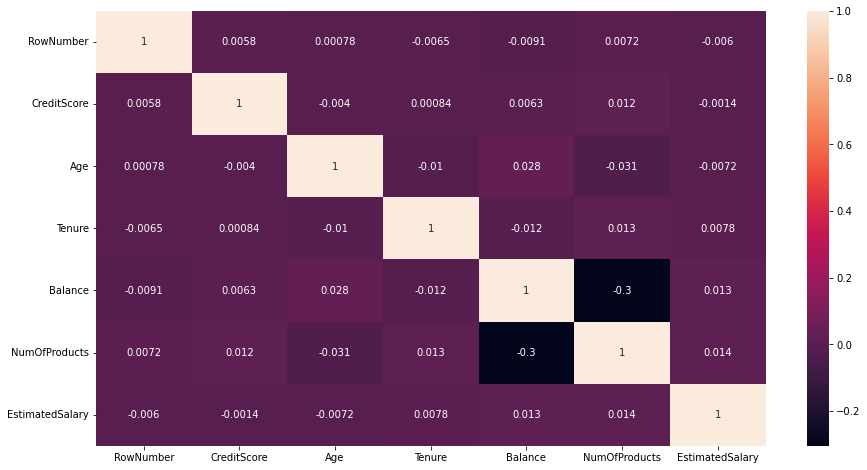

In [23]:
#Correlation
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, \
xticklabels=corr.columns.values,\
yticklabels=corr.columns.values,\
annot=True)
corr

In [24]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'No of Customers')

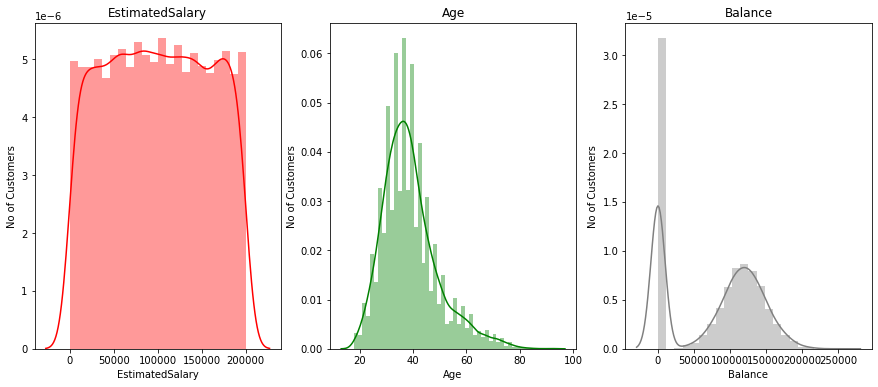

In [25]:
#start Univariate analysis
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.EstimatedSalary, kde=True, color="red", \
ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')

sns.distplot(data.Age, kde=True, color="green", \
             ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')

sns.distplot(data.Balance, kde=True, color="gray", \
ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer churn Distribution by Gender')

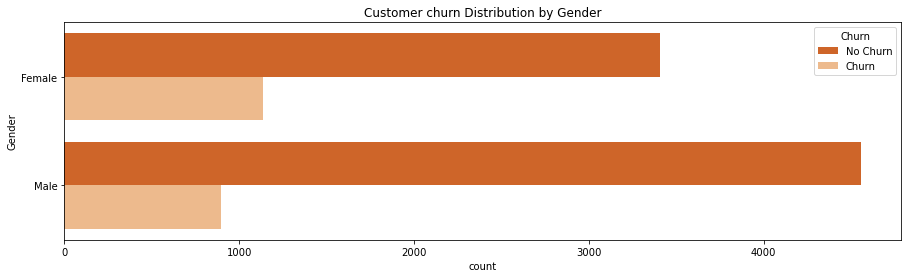

In [26]:
#gender using bivariate analysis
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender",hue="Churn",data=data,\
               palette="Oranges_r")
legend=p.get_legend()
legend_txt=legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer churn Distribution by Gender')

Text(0.5, 1.0, 'Customer churn Distribution by Geography')

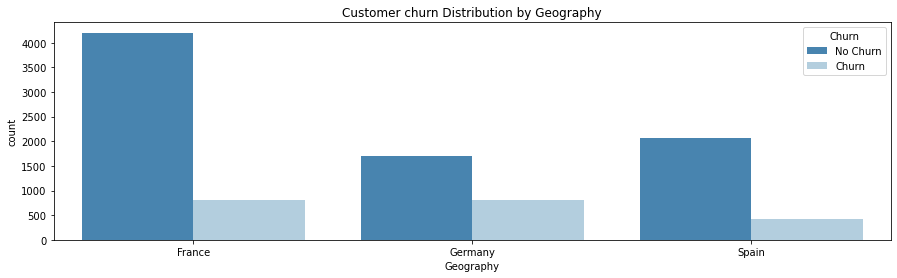

In [27]:
#Geography vs Churn
plt.figure(figsize=(15,4))
p=sns.countplot(x="Geography",hue="Churn",data=data,\
               palette="Blues_r")
legend=p.get_legend()
legend_txt=legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer churn Distribution by Geography')

Text(0.5, 1.0, 'Customer churn Distribution by NumOfProducts')

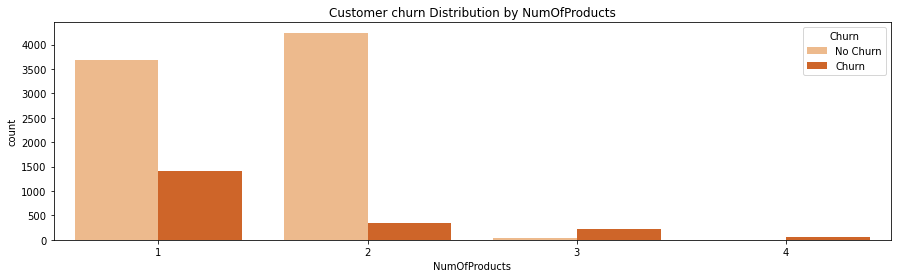

In [28]:
#NumberofProducts vs Churn
plt.figure(figsize=(15,4))
p=sns.countplot(x="NumOfProducts",hue="Churn",data=data,\
               palette="Oranges")
legend=p.get_legend()
legend_txt=legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer churn Distribution by NumOfProducts')

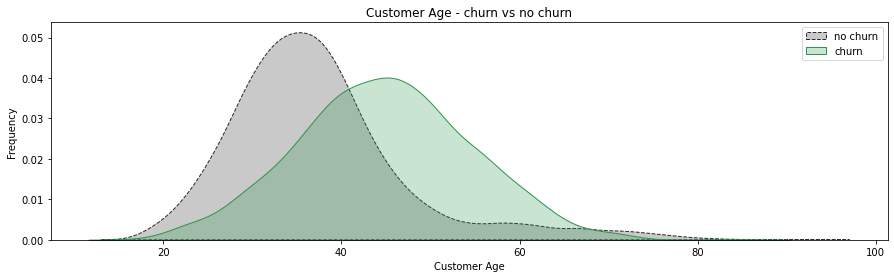

In [29]:
#Churn vs Age
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , \
color=sns.color_palette("Greys_r")[0],\
shade=True,label='no churn', \
linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , \
color=sns.color_palette("Greens_r")[1],\
shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')
plt.legend()

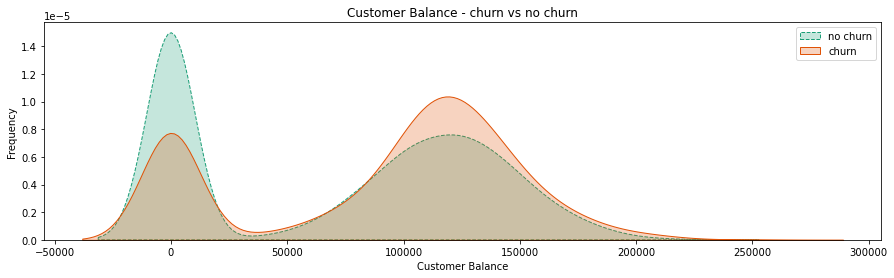

In [30]:
#Balance vs Churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , \
color=sns.color_palette("Dark2")[0],\
shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , \
color=sns.color_palette("Oranges_r")[1],\
shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')
plt.legend()

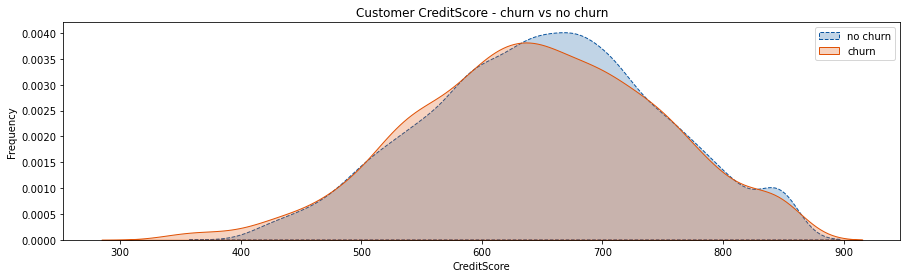

In [31]:
#CreditScore vs Churn
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , \
color=sns.color_palette("Blues_r")[0],\
shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , \
color=sns.color_palette("Oranges_r")[1],\
shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')
plt.legend()

Text(0.5, 1.0, 'Number of Product VS Balance')

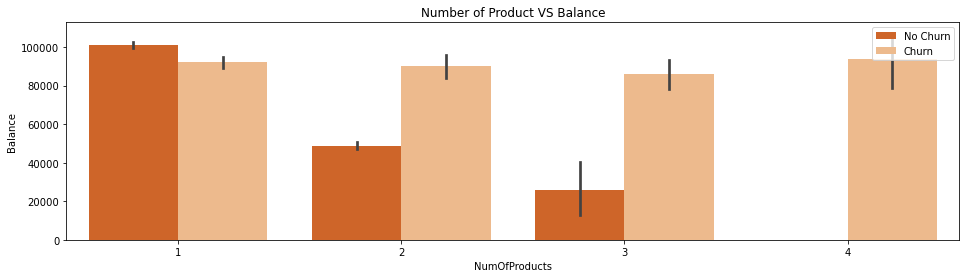

In [32]:
#Balance and NumOfproduct by Churn
plt.figure(figsize=(16,4))
p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn',\
data=data, palette="Oranges_r")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance')

In [33]:
#performing Features selections
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
data.dtypes
### Encoding the categorical variables
data["Geography"] = data["Geography"].astype('category')\
.cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes
data["HasCrCard"] = data["HasCrCard"].astype('category')\
.cat.codes
data["Churn"] = data["Churn"].astype('category').cat.codes

In [35]:
#Split the data into training and test 
target = 'Churn'
X = data.drop('Churn', axis=1)
y=data[target]
X_train, X_test, y_train, y_test = train_test_split\
(X,y,test_size=0.15, \
random_state=123, \
stratify=y)

In [36]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

In [37]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [38]:
#fit logistic regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
Classifier=LogisticRegression(random_state=0)
Classifier.fit(X_train,y_train)
logReg = sm.Logit(y_train, X_train)
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.442239
         Iterations 6


In [39]:
logistic_regression.summary
logistic_regression.params

RowNumber         -3.787268e-05
CreditScore       -3.577747e-03
Geography          4.874751e-02
Gender            -6.248850e-01
Age                6.176988e-02
Tenure            -4.673399e-02
Balance            3.489190e-06
NumOfProducts     -2.930586e-01
HasCrCard         -1.642878e-01
IsActiveMember    -1.079644e+00
EstimatedSalary   -9.023740e-07
dtype: float64

In [40]:
import statsmodels.api as sm
top5_features = ['Age','EstimatedSalary','CreditScore',\
'Balance','NumOfProducts']
logReg = sm.Logit(y_train, X_train[top5_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472857
         Iterations 6


In [41]:
logistic_regression.summary
logistic_regression.params

Age                0.048356
EstimatedSalary   -0.000001
CreditScore       -0.004471
Balance            0.000003
NumOfProducts     -0.361468
dtype: float64

In [42]:
#function Creation
coef = logistic_regression.params
def y (coef, Age, EstimatedSalary, CreditScore, Balance, \
NumOfProducts) : return coef[0]*Age+ coef[1]\
*EstimatedSalary+coef[2]*CreditScore\
+coef[1]*Balance+coef[2]*NumOfProducts

In [43]:
#checking Cutomer Churn Prediction 
import numpy as np
y1 = y(coef, 60, 100000, 550,100000,2)
p = np.exp(y1) / (1+np.exp(y1))
p

0.5564591787198943

In [44]:
from sklearn.linear_model import LogisticRegression
clf_logistic=LogisticRegression(random_state=0,solver='lbfgs')\
    .fit(X_train[top5_features],y_train)

In [45]:
clf_logistic.predict(X_test[top5_features])
clf_logistic.predict_proba(X_test[top5_features])

array([[0.61546446, 0.38453554],
       [0.76703053, 0.23296947],
       [0.78135159, 0.21864841],
       ...,
       [0.55232038, 0.44767962],
       [0.85319191, 0.14680809],
       [0.75857364, 0.24142636]])

In [46]:
clf_logistic.score(X_test[top5_features],y_test)

0.79

In [47]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics

In [48]:
y_pred=clf_logistic.predict(X_test[top5_features])
target_names=['No Churn','Churn']
print(classification_report(y_test,y_pred,\
                           target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.80      0.97      0.88      1194
       Churn       0.41      0.07      0.12       306

    accuracy                           0.79      1500
   macro avg       0.61      0.52      0.50      1500
weighted avg       0.72      0.79      0.73      1500



In [49]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,\
index = ['No Churn','Churn'],\
columns = ['No Churn','Churn'])

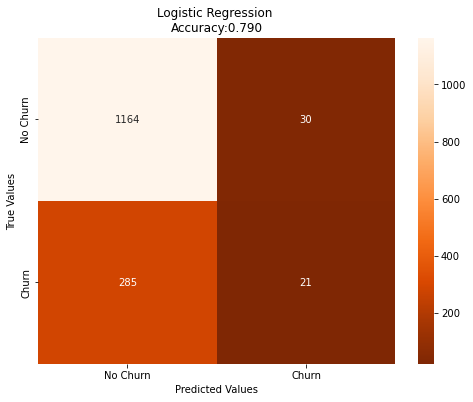

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Oranges_r')
plt.title('Logistic Regression \nAccuracy:{0:.3f}'\
.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
from sklearn.metrics import roc_curve,auc

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

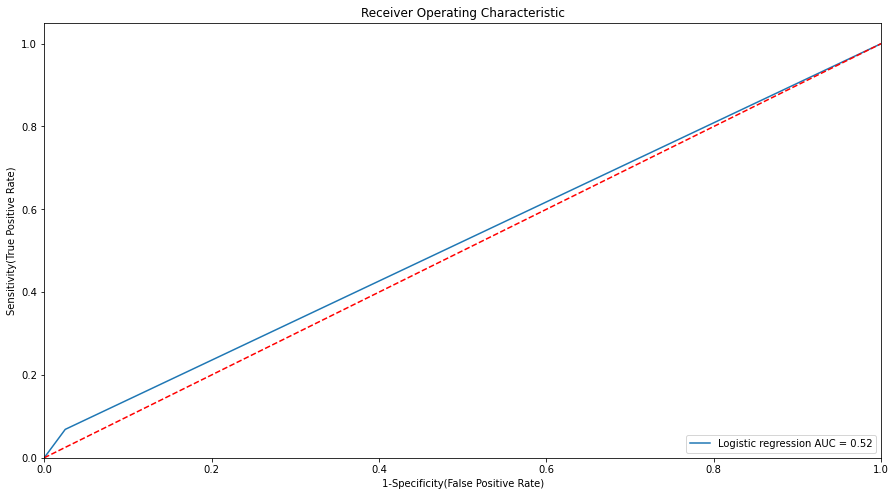

In [53]:
plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='%s AUC = %0.2f' % \
('Logistic regression', roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
#logit_roc_auc=clf(y_test,logreg.predict(X_test))
#fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
#plot.figure()
#plot.plot(fpr,tpr,label='Logistic Regression (area %0.2f)'%logit_roc_auc)
#plt.plot([0,1],[0,1],'r--')
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.05])
#plt.xlabel('False Positive rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristics')
#plt.legend(loc="Lower Right")
#plt.show()

## DECISION TREE

In [55]:
#pip install graphviz

In [56]:
#pip install six

In [57]:
#pip install pydotplus

In [58]:
import graphviz
from sklearn import tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [59]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

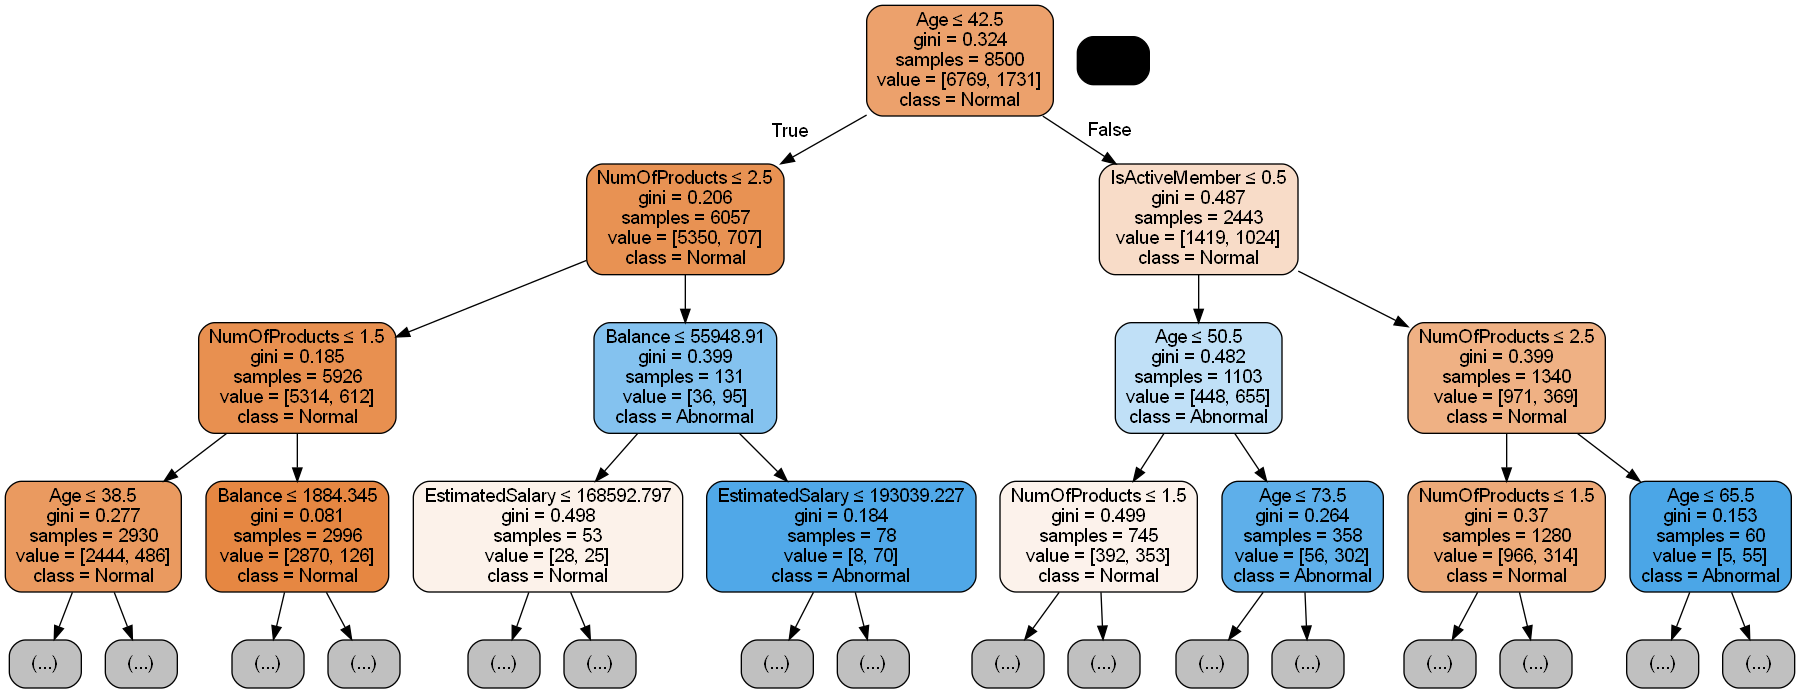

In [60]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,\
                filled=True, rounded=True,\
                class_names=['Normal','Abnormal'],\
                max_depth = 3,
                special_characters=True,\
                feature_names=X.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [61]:
clf_tree.score(X_test, y_test)

0.7773333333333333

## RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf = RandomForestClassifier(n_estimators=20, max_depth=None,\
                            min_samples_split=7, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [64]:
clf.score(X_test,y_test)

0.864

## Performance Metrices

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [66]:
clf_random = RandomForestClassifier(n_estimators=20, \
                                    max_depth=None,\
                                    min_samples_split=7, \
                                    random_state=0)
clf_random.fit(X_train[top5_features],y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [67]:
y_pred=clf_random.predict(X_test[top5_features])

In [68]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, \
                            target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.86      0.94      0.90      1194
       Churn       0.64      0.41      0.50       306

    accuracy                           0.83      1500
   macro avg       0.75      0.67      0.70      1500
weighted avg       0.82      0.83      0.82      1500



In [69]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,\
                     index = ['No Churn','Churn'],\
                     columns = ['No Churn','Churn'])

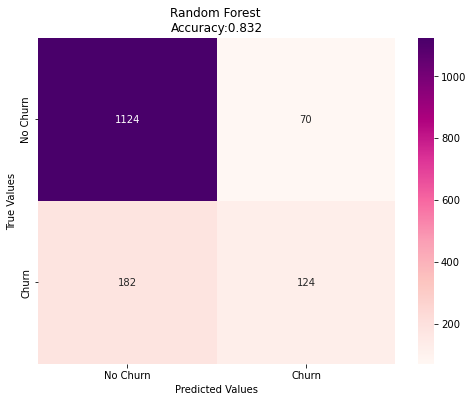

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='RdPu')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
           .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [71]:
from sklearn.metrics import roc_curve,auc

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

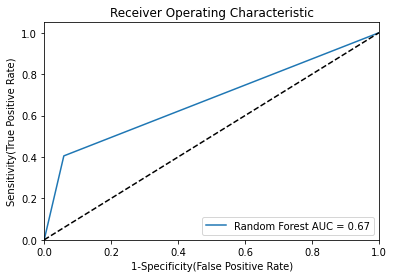

In [73]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='%s AUC = %0.2f' % \
         ('Random Forest', roc_auc))
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [77]:
models = {
    'logistic_regression': clf_logistic,
    'Random_Forest': clf_random,
    'Decision_Tree': clf_tree
}

SyntaxError: invalid syntax (2504120444.py, line 3)

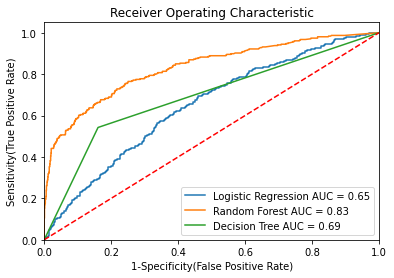

In [78]:
models = {
    'logistic_regression': {'model': clf_logistic, 'label': 'Logistic Regression'},
    'Random_Forest': {'model': clf_random, 'label': 'Random Forest'},
    'Decision_Tree': {'model': clf_tree, 'label': 'Decision Tree'}
}

plt.figure()
for m in models:
    model = models[m]['model']
    model.fit(X_train, y_train) # replace X_train and y_train with your actual training data
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (models[m]['label'], roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()